In [0]:
import os
os.chdir("drive/My Drive/FakeNews")

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!unzip *.zip

Archive:  download.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [0]:
import pandas as pd
import numpy as np
fake_df = pd.read_csv("Fake.csv", encoding= "utf-8")
true_df = pd.read_csv("True.csv", encoding = "utf-8")

In [0]:
import nltk
# nltk.download('averaged_perceptron_tagger')
import random
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Subject count for True News')

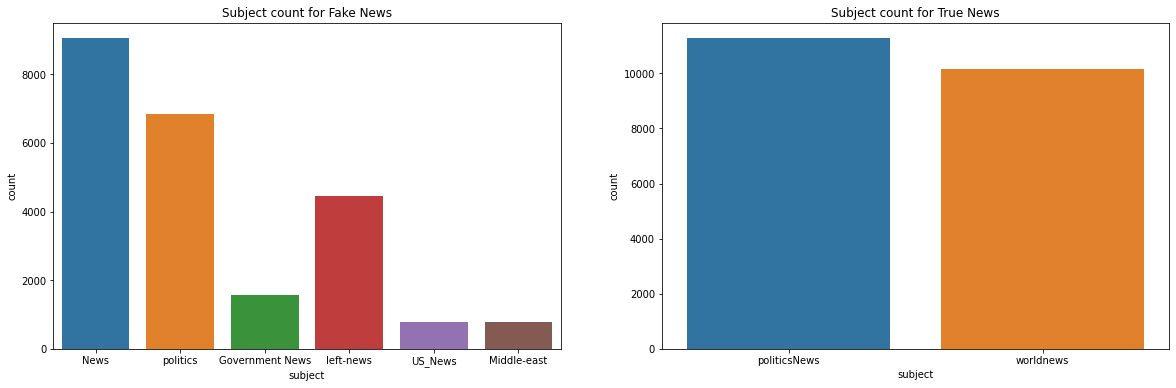

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
sns.countplot(x = "subject", data = fake_df, ax = ax1)
sns.countplot(x = "subject", data = true_df, ax = ax2)
ax1.set_title("Subject count for Fake News")
ax2.set_title("Subject count for True News")


The news subject is not a relaible metric to determine news genuinity as the labels for both the datasets are completely different.


In [17]:
fake_df["Cat"] = 0
true_df["Cat"] = 1
print(f"fake news:{len(fake_df)}")
print(f"true news:{len(true_df)}")

fake news:23481
true news:21417


In [0]:
main_df = pd.concat([fake_df,true_df]).reset_index()

In [26]:
main_df.head()

,index,title,text,subject,date,Cat
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",0


Text(0.5, 1.0, 'Fake and True')

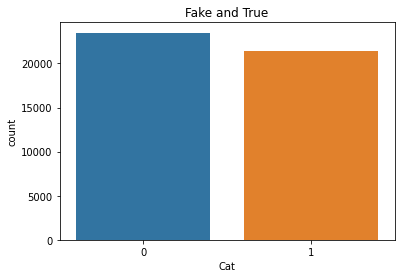

In [19]:
sns.countplot(x = "Cat", data = main_df)
plt.title("Fake and True")

In [0]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

stop_words =set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import PorterStemmer 

def preprocess(text):
  word_list = []
  tok = tokenizer.tokenize(text)
  for word in tok:
    if word not in stop_words:
      word_list.append(stemmer.stem(word))
  return " ".join(word_list)
  






In [10]:
preprocess("My name is Ebrahim, and for five years I was stranded on an island")

'My name ebrahim five year I strand island'

In [0]:
main_df["text"] = main_df["title"] + " " + main_df["text"]

In [0]:
x_data = main_df["text"].apply(preprocess)

In [32]:
x_data.head()

0    donald trump send out embarrass new year eve m...
1    drunk brag trump staffer start russian collus ...
2    sheriff david clark becom An internet joke for...
3    trump Is So obsess He even ha obama name code ...
4    pope franci just call out donald trump dure hi...
Name: text, dtype: object

In [0]:
from numpy import save
save('text_data.npy', x_data.values)
save('labels.npy',main_df["Cat"].values)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, main_df['Cat'].values, test_size=0.10, random_state=42)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

In [45]:
len(vectorizer.get_feature_names())


92164

In [0]:
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=10)
selected_train = selector.fit_transform(x_train_tfidf, y_train).toarray()
selected_test = selector.transform(x_test_tfidf).toarray()

In [0]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode

In [48]:
BernModel = BernoulliNB()
BernModel.fit(selected_train, y_train)
print(f"Training Score : {BernModel.score(selected_train, y_train)}")
print(f"Test Score : {BernModel.score(selected_test, y_test)}")

Training Score : 0.9721342308453772
Test Score : 0.967706013363029


In [0]:
import pickle
save_classifier = open("BernoulliNB.pickle","wb")
pickle.dump(BernModel, save_classifier)
save_classifier.close()

In [0]:
save_tfid = open("TFidf.pickle","wb")
pickle.dump(vectorizer, save_tfid)
save_tfid.close()

In [0]:
save_sel = open("Selector.pickle", "wb")
pickle.dump(selector,save_sel)
save_sel.close()

In [60]:
GaussModel = GaussianNB()
GaussModel.fit(selected_train, y_train)
print(f"Training Score : {GaussModel.score(selected_train, y_train)}")
print(f"Test Score : {GaussModel.score(selected_test, y_test)}")

Training Score : 0.9599089289249654
Test Score : 0.9309576837416481


In [0]:
save_classifier = open("GaussianNB.pickle","wb")
pickle.dump(GaussModel, save_classifier)
save_classifier.close()

In [54]:
LogModel = LogisticRegression()
LogModel.fit(selected_train,y_train)
print(f"Training Score : {LogModel.score(selected_train, y_train)}")
print(f"Test Score : {LogModel.score(selected_test, y_test)}")

Training Score : 0.9915363294397149
Test Score : 0.9888641425389755


In [0]:
save_classifier = open("LogisticReg.pickle","wb")
pickle.dump(LogModel, save_classifier)
save_classifier.close()

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(selected_train,y_train)
print(f"Training Score : {rf.score(selected_train, y_train)}")
print(f"Test Score : {rf.score(selected_test, y_test)}")


Training Score : 1.0
Test Score : 0.9977728285077951


In [0]:
save_classifier = open("RandomForest.pickle","wb")
pickle.dump(rf, save_classifier)
save_classifier.close()

In [58]:
sgd = SGDClassifier()
sgd.fit(selected_train,y_train)
print(f"Training Score : {sgd.score(selected_train, y_train)}")
print(f"Test Score : {sgd.score(selected_test, y_test)}")


Training Score : 0.9942090675113839
Test Score : 0.9922048997772829


In [0]:
save_classifier = open("SGD.pickle","wb")
pickle.dump(sgd, save_classifier)
save_classifier.close()

In [64]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier([('rf',rf), ('lr',LogModel), ('sgd',sgd), ('bm',BernModel),("gm",GaussModel)])
voting.fit(selected_train,y_train)
print(f"Training Score : {voting.score(selected_train, y_train)}")
print(f"Test Score : {voting.score(selected_test, y_test)}")


Training Score : 0.9947040190061374
Test Score : 0.9913140311804008


In [0]:
save_classifier = open("voting.pickle","wb")
pickle.dump(voting, save_classifier)
save_classifier.close()

Text(0.5, 1.0, 'Confusion Matrix for Voting Classifier')

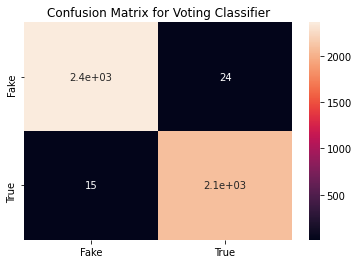

In [67]:
from sklearn import metrics
pred = voting.predict(selected_test)
cm=metrics.confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm, index = ["Fake", "True"], columns=["Fake", "True"])
sns.heatmap(cm, annot = True)
plt.title("Confusion Matrix for Voting Classifier")

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

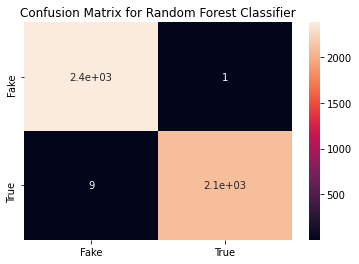

In [68]:
pred = rf.predict(selected_test)
cm=metrics.confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm, index = ["Fake", "True"], columns=["Fake", "True"])
sns.heatmap(cm, annot = True)
plt.title("Confusion Matrix for Random Forest Classifier")